In [154]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [155]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/archive/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [156]:
#data preparation
#handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [157]:
#data preparation
#handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [158]:
df.isna().sum()


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [159]:
df.columns


Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [160]:
df['wip'] = df['wip'].fillna(df['wip'].mean())


In [161]:
df.drop(['date','targeted_productivity'], axis=1, inplace=True)


In [146]:
df.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [162]:
df = df.rename(columns={
    'team' : 'team_number',
    'smv' : 'time_allocated',
    'wip' : 'unfinished_items',
    'no_of_style_change' : 'style_change'
})
df

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [163]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [164]:
df['quarter'] = df['quarter'].str.replace('Quarter5','Quarter1')

In [28]:
df.head()

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [29]:
# Extract the numerical part from the 'quarter' column
df['quarter'] = df['quarter'].str.extract(r'(\d+)')
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: object

In [36]:
df['department'] = df['department'].str.replace('sweing','sewing')

df['department'] = df['department'].str.replace('finishing ','finishing')

In [37]:
df['team_number'] = df['team_number'].astype(int)
df['over_time'] = df['over_time'].astype(int)
df['incentive'] = df['incentive'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['idle_men'] = df['idle_men'].astype(int)
df['style_change'] = df['style_change'].astype(int)

In [38]:
df['idle_time'] = df['idle_time'].astype(int)

In [39]:
df['time_allocated'] = df['time_allocated'].astype(int)df['unfinished_items'] = df['unfinished_items'].astype(int)

In [40]:
df['unfinished_items'] = df['unfinished_items'].astype(int)

In [41]:
df['no_of_workers'] = df['no_of_workers'].astype(int)

In [42]:
lc = LabelEncoder()

In [43]:
print('Before encoding: ', df['department'].unique())
df['department'] = lc.fit_transform(df['department'])
print('After encoding: ',df['department'].unique())

Before encoding:  ['sewing' 'finishing ' 'finishing']
After encoding:  [2 1 0]


In [44]:
print('Before encoding: ', df['day'].unique())
df['day'] = lc.fit_transform(df['day'])
print('After encoding: ',df['day'].unique())

Before encoding:  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After encoding:  [3 1 2 0 4 5]


In [45]:
#Exploratory Data Analysis
#Descriptive Statistical
df.describe(include='all')

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.369256,2.534670,6.426901,14.508772,1190.269006,4567.460317,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,NaN,0.805909,1.714538,3.463963,11.067638,1395.647280,3348.823563,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,NaN,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,1.000000,1.000000,3.000000,3.000000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,2.000000,3.000000,6.000000,15.000000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,2.000000,4.000000,9.000000,24.000000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


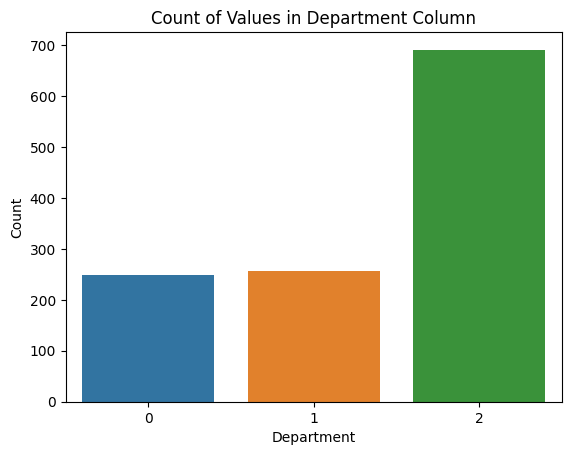

In [46]:
#visual analyais
#univariable analysis
sns.countplot(data=df, x='department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Values in Department Column')
plt.show()

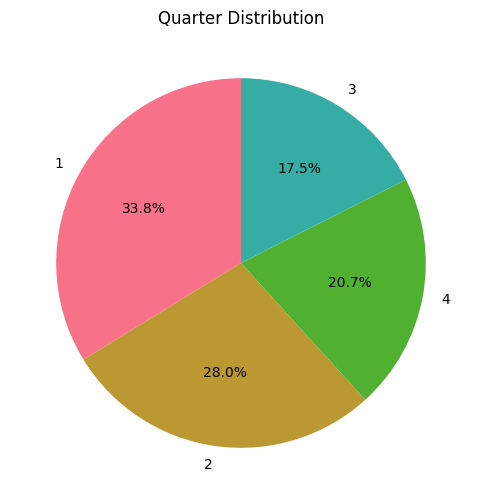

In [47]:
quarter_counts = df[ 'quarter' ].value_counts()
plt.figure(figsize=(8,6))
sns.set_palette("husl") #set custom color palette
plt.pie(quarter_counts,labels=quarter_counts.index,autopct='%1.1f%%',startangle=90)
plt.title( 'Quarter Distribution' )
plt.show()

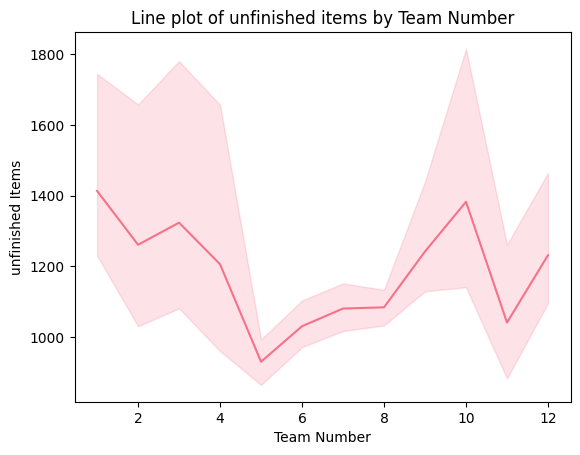

In [48]:
sns.lineplot(data=df,x='team_number',y='unfinished_items')
plt.xlabel('Team Number')
plt.ylabel('unfinished Items')
plt.title('Line plot of unfinished items by Team Number')
plt.show()

<ipython-input-49-abe6031a6d74>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


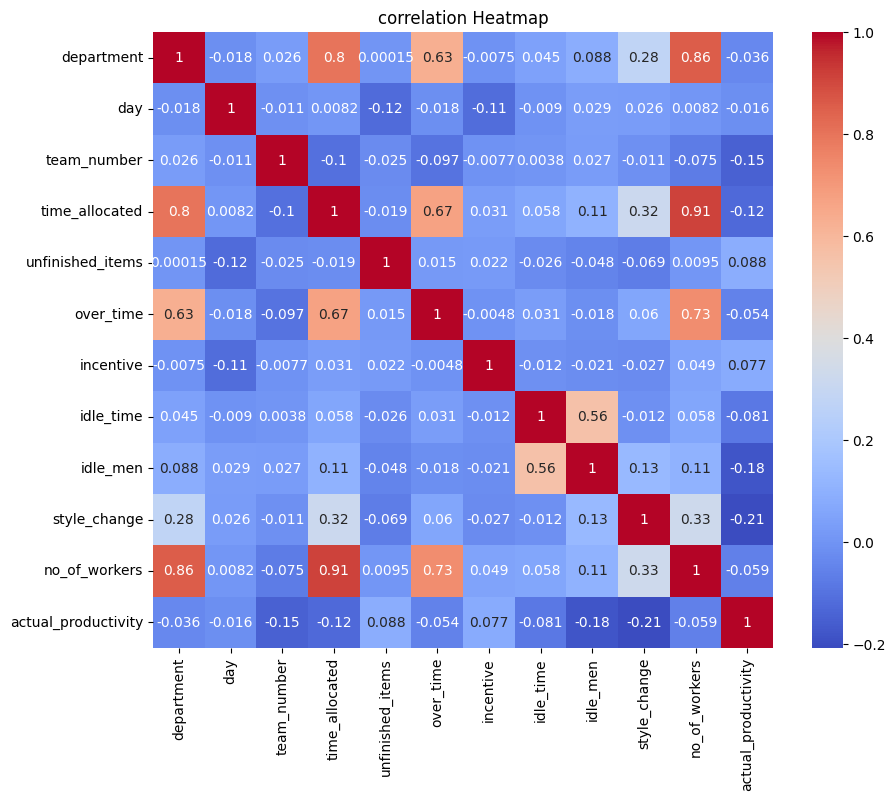

In [49]:
# create a heatmap of correlation between numerical variables with a large size
plt.figure(figsize=(10,8)) # set the figure size
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [50]:
# X consists of independent variables
X = df.drop(['actual_productivity'],axis=1)
X

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,1,2,3,8,26,1108,7080,98,0,0,0,59
1,1,1,3,1,3,1190,960,0,0,0,0,8
2,1,2,3,11,11,968,3660,50,0,0,0,30
3,1,2,3,12,11,968,3660,50,0,0,0,30
4,1,2,3,6,25,1170,1920,50,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,2,1190,960,0,0,0,0,8
1193,2,0,5,8,3,1190,960,0,0,0,0,8
1194,2,0,5,7,3,1190,960,0,0,0,0,8
1195,2,0,5,9,2,1190,1800,0,0,0,0,15


In [51]:
y = df['actual_productivity']
y


0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 12)
(240, 12)
(957,)
(240,)


In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your DataFrame
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

sc = StandardScaler()
X_scaled = X.copy()  # Create a copy of your DataFrame

# Standardize only the numeric columns
X_scaled[numeric_columns] = sc.fit_transform(X[numeric_columns])


In [54]:
import pandas as pd

# Define 'col' as a list of column names
col = ['date', 'quarter', 'department', 'day', 'team_number',
       'targeted_productivity', 'time_allocated', 'unfinished_items',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'style_change',
       'no_of_workers', 'actual_productivity', 'productivity_difference']  # Replace with your actual column names

# Set the columns of X_scaled to the values in 'col'
X_scaled = pd.DataFrame(X_scaled, columns=col)
X_scaled



,date,quarter,department,day,team_number,targeted_productivity,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity,productivity_difference
0,NaN,1,0.782976,0.271516,0.454323,NaN,1.038707,-0.058971,0.750589,0.373414,-0.057278,-0.113005,-0.351617,1.104109,NaN,NaN
1,NaN,1,-0.458378,0.271516,-1.567329,NaN,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070,NaN,NaN
2,NaN,1,0.782976,0.271516,1.320745,NaN,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542,NaN,NaN
3,NaN,1,0.782976,0.271516,1.609552,NaN,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542,NaN,NaN
4,NaN,1,0.782976,0.271516,-0.123292,NaN,0.948316,-0.014529,-0.790895,0.073631,-0.057278,-0.113005,-0.351617,0.968628,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,2,-1.699732,1.438498,1.031937,NaN,-1.130684,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070,NaN,NaN
1193,NaN,2,-1.699732,1.438498,0.454323,NaN,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070,NaN,NaN
1194,NaN,2,-1.699732,1.438498,0.165515,NaN,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070,NaN,NaN
1195,NaN,2,-1.699732,1.438498,0.743130,NaN,-1.130684,-0.000193,-0.826743,-0.238643,-0.057278,-0.113005,-0.351617,-0.882948,NaN,NaN


In [55]:
df.columns

Index(['quarter', 'department', 'day', 'team_number', 'time_allocated',
       'unfinished_items', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# model building
# linear regression model



In [58]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lr = LinearRegression()

# Now, you can fit the model with your data
lr.fit(X_train, y_train)


LinearRegression()

In [59]:
model = DecisionTreeRegressor(max_depth= 4, min_samples_split= 3, min_samples_leaf= 2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [60]:
model = RandomForestRegressor(n_estimators = 100,
                              max_depth = 6,
                              min_weight_fraction_leaf = 0.05,
                              max_features = 0.8,
                              random_state = 42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [61]:
model= GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [62]:
X_train = pd.get_dummies(X_train, columns=['quarter'])
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05,
                   max_leaves=3, random_state=1, enable_categorical=True)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [63]:

# Define base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create bagging regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Fit bagging regressor
bagging_reg.fit(X_train, y_train)


BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=2,
                                        max_leaves=3, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=700,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=1, ...),
                 n_estimators=100, random_state=42)

In [64]:
#Deline base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create AdaBoost regressor
boosting_reg= AdaBoostRegressor (base_model, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit AdaBoost regressor
boosting_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.06, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=2,
                                         max_leaves=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=700,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=1, ...),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
#linear regression model

In [82]:
#training score
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

Root Mean Squared Error: 0.14313553924218128


In [69]:
# Assuming you have a model named 'model' and you want to predict on your test data
predict_test = model.predict(X_test)

# Now you can calculate the mean squared error
mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)


Root Mean Squared Error: 0.1344167958252451


In [ ]:
#decision tree model

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
dtr_model = DecisionTreeRegressor()

# Fit the model to your training data
dtr_model.fit(X_train, y_train)

# Now you can make predictions on your training data
predict_train_dtr = dtr_model.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)


Root Mean Squared Error: 0.008189080812766444


In [71]:
# Assuming you have a DecisionTreeRegressor model named 'dtr_model' and you want to predict on your training data
predict_test_dtr = dtr_model.predict(X_test)

# Now you can calculate the mean squared error
mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)

Root Mean Squared Error: 0.1758779781568374


In [ ]:
#random forest regresion model

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rfr_model = RandomForestRegressor()

# Fit the model to your training data
rfr_model.fit(X_train, y_train)

# Now you can make predictions on your training data
predict_train_rfr = rfr_model.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)



Root Mean Squared Error: 0.04945326163504577


In [83]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rfr_model = RandomForestRegressor()

# Fit the model to your training data
rfr_model.fit(X_test, y_test)

# Now you can make predictions on your training data
predict_test_rfr = rfr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)


Root Mean Squared Error: 0.047804355890328804


In [86]:
#boosting regression model

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Fit the model to your training data
gbr_model.fit(X_train, y_train)

# Now you can make predictions on your training data
predict_train_gbr = gbr_model.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)



Root Mean Squared Error: 0.10744257099114687


In [88]:
# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Fit the model to your training data
gbr_model.fit(X_test, y_test)

# Now you can make predictions on your training data
predict_test_gbr = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

Root Mean Squared Error: 0.07454750948079274


In [90]:
#gradient boost regresson model
import xgboost as xgb

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create and train your gradient boost regression model (xgboost or similar)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the training data
predict_train_xgb = model.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)


Root Mean Squared Error: 0.10744257099114687


In [110]:

predict_test_xgb = model.predict(X_test)

# Calculate the mean squared error for the test data
mse = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error for Test Data:', rmse_xgb_test)


Root Mean Squared Error for Test Data: 0.1272610770983626


In [78]:
#bagging regresion model

In [115]:
#Evaluate performance
train_rmse_bo = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_bo = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Bagging Regressor:")
print (f"Training RMSE: {train_rmse_bo}")
print (f"Testing RMSE: {test_rmse_bo}")

Bagging Regressor:
Training RMSE: 0.05800982062729765
Testing RMSE: 0.12534636153919948


In [116]:
#boosting regressor
#Evaluate performance
train_rmse_bo = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_bo = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("AdaBoost Regressor:")
print (f"Training RMSE: {train_rmse_bo}")
print (f"Testing RMSE: {test_rmse_bo}")

AdaBoost Regressor:
Training RMSE: 0.05800982062729765
Testing RMSE: 0.12534636153919948


In [120]:
#dumping the selected model
pickle.dump(boosting_reg,open('productivity.pkl', 'wb'))